# We plot the peak width at fixed $\beta$ but as a function of system size

In [1]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [12]:
#import dill
#dill.dump_session('./data_bruckner/data/notebookData/2_width_vs_CorrLengthEXT-LargeN-RBM.db')

In [4]:
import dill
dill.load_session('./data_bruckner/data/notebookData/2_width_vs_CorrLengthEXT-LargeN-RBM.db')

In [2]:
def beta_from_corrLength(corrLen):
    beta = np.tan((np.exp(-1./corrLen)))
    return beta

In [3]:
beta = 1.07

In [9]:
Num_configs = 25000
Nstep       = int(beta*1000/1.5)
N           = np.arange(100,2200,200)
N           = N.astype(int)
N
print('Num_steps = ' + np.str(Nstep))
print(N)

Num_steps = 713
[ 100  300  500  700  900 1100 1300 1500 1700 1900 2100]


## True Error bars with multiple runs of the data generation and fitting

In [ ]:
#%%capture captX

Xdata_big    = []
Xresults_big = []

XBM      = []
Xdata    = []
Xresults = []
XRBM     = []

Num_reps = 1

for j in range(Num_reps):
    
    XBM      = []
    Xdata    = []
    Xresults = []
    XRBM     = []
    
    for i in np.arange(len(N)):
        #Generate spins using Gibbs Sampling MCMC
        XBM.append(bm.BM(N=N[i],nature='Spin'))

        #Define Couplings
        XBM[i].layer.couplings =  beta*(np.eye(N=N[i],k=1) + np.eye(N=N[i],k=-1) )
        XBM[i].layer.couplings[0,-1] += beta
        XBM[i].layer.couplings[-1,0] += beta

        #Generating the ising model data
        Xdata.append(XBM[i].gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=Nstep)) # N steps.

        #Train the model
        XRBM.append(rbm.RBM(visible = 'Spin', n_v=N[i], n_h = 1, hidden = 'Spin',zero_field = True))
        Xresults.append(XRBM[i].fit(Xdata[i],n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=1000,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False))
        
    Xdata_big.append(Xdata)
    Xresults_big.append(Xresults)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

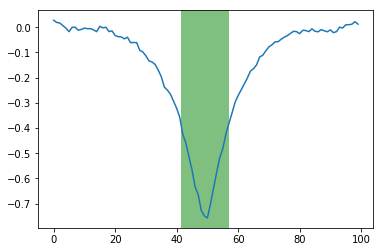

0


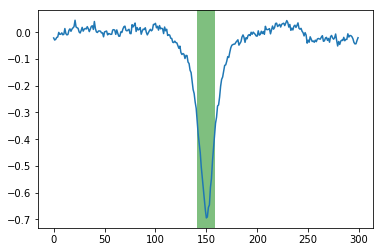

1


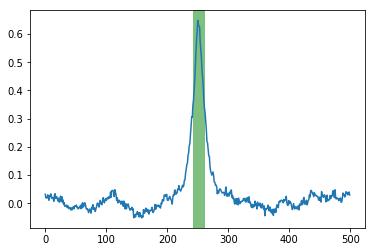

2


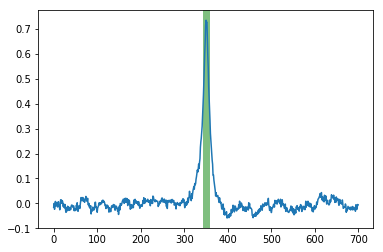

3


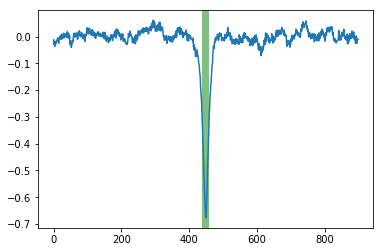

4


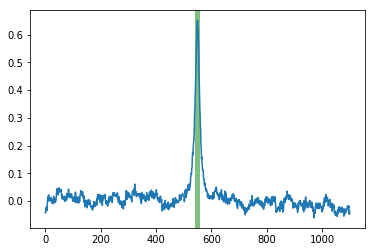

5


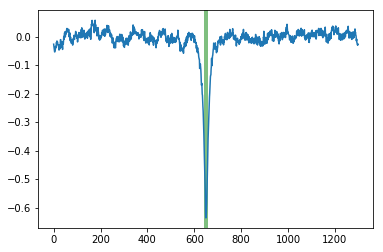

6


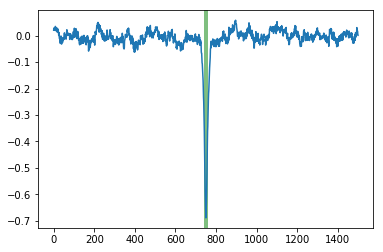

7


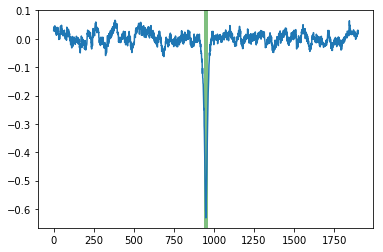

8


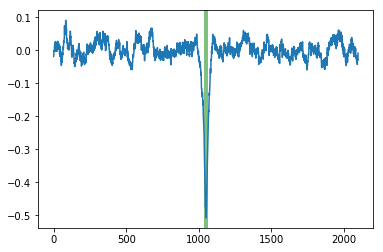

9


In [33]:
import peakWidth
XFWHM_avg = []
XFWHM_error = []

for i in np.arange(len(N)):
    
    t1 = np.zeros(Num_reps)
    
    for j in range(Num_reps):
        t1[j] = np.array(peakWidth.peakWidth(weight=np.array(Xresults_big[j][i]['W'])[-1,0,:],plot=True))
        print(i)
    XFWHM_avg.append(np.mean(t1))
    XFWHM_error.append(np.std(t1))

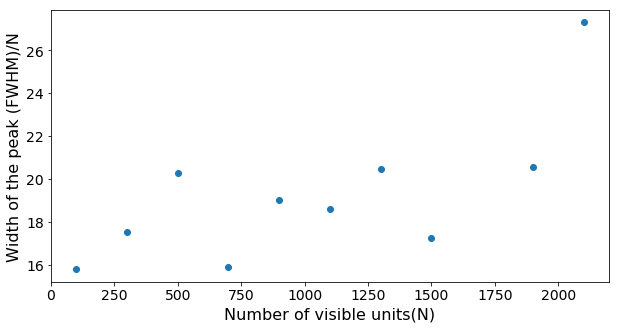

In [36]:
#Plot FWHM as a function of the correlation length
import numpy as np

plt.figure(figsize=(10,5))
#Xfit = np.polyfit(corrLengths,XFWHM_avg, deg=1)
#plt.plot(corrLengths, Xfit[0] * corrLengths + Xfit[1], color='red')
#plt.errorbar(N,XFWHM_avg/N,yerr=XFWHM_error,xlolims=0,fmt='o',ecolor='g')
plt.plot(N,XFWHM_avg,'o')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Number of visible units(N)',fontsize=16)
plt.ylabel('Width of the peak (FWHM)/N',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [14]:
#Plot FWHM as a function of the correlation length
import numpy as np

plt.figure(figsize=(15,10))
Xfit = np.polyfit(corrLengths,XFWHM_avg, deg=1)
plt.plot(corrLengths, Xfit[0] * corrLengths + Xfit[1], color='red')
plt.errorbar(corrLengths,XFWHM_avg,yerr=XFWHM_error,xlolims=0,fmt='o',ecolor='g')
plt.xlabel('Correlation Length of the ising model (in number of visible units)',fontsize=20)
plt.ylabel('Width of the peak (in number of visible units)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

NameError: name 'corrLengths' is not defined